# Exploring Covid-19 cases

In [2067]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
from matplotlib.ticker import ScalarFormatter

import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime, timedelta

import requests

In [4]:
#projectpath=''

# read the data

first, download files from url
https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/

In [2444]:
# download files 
CATEGORIES = ('Confirmed', 'Deaths', 'Recovered')
base_url = f'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/'

for category in CATEGORIES:
    file = f'time_series_19-covid-{category}.csv'
    url = base_url + file
    print(file)
    r = requests.get(url)
    
    with open(projectpath+file, 'wb') as f:
        f.write(r.content)

time_series_19-covid-Confirmed.csv
time_series_19-covid-Deaths.csv
time_series_19-covid-Recovered.csv


## clean data

In [750]:
file_confirmed = projectpath+'time_series_19-covid-Confirmed.csv'
df0=pd.read_csv(file_confirmed)
df0.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,53,59,70,75,82,114,147,177,212
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,511,581,639,639,701,773,839,825,878,889
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,160,178,178,200,212,226,243,266,313
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,117,129,149,149,197,238,428,566,673,790


In [2419]:
df0[df0['Country/Region']=='Austria']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
32,NaN,Austria,47.5162,14.5501,0,0,0,0,0,0,...,131,182,246,302,504,655,860,1018,1332,1646


for some countries data is separated for regions

In [752]:
country='China'
#country='US'
df0[df0['Country/Region']==country].head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
154,Hubei,China,30.9756,112.2707,444,444,549,761,1058,1423,...,67743,67760,67773,67781,67786,67790,67794,67798,67799,67800
158,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1352,1353,1356,1356,1356,1356,1360,1361,1364,1370
159,Henan,China,33.8820,113.6140,5,5,9,32,83,128,...,1272,1272,1273,1273,1273,1273,1273,1273,1273,1273


for some countries data is given for the 'mainland' and dependencies

In [753]:
country='Denmark'
#country='France'
df0[df0['Country/Region']==country]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
170,Denmark,Denmark,56.2639,9.5018,0,0,0,0,0,0,...,90,262,442,615,801,827,864,914,977,1057
197,Faroe Islands,Denmark,61.8926,-6.9118,0,0,0,0,0,0,...,2,2,2,2,3,9,11,18,47,58


In [754]:
country='Denmark'
#country='France'
df0[(df0['Country/Region'].values==country) & ~(df0['Province/State'].values==country)]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
197,Faroe Islands,Denmark,61.8926,-6.9118,0,0,0,0,0,0,...,2,2,2,2,3,9,11,18,47,58


In [755]:
df0[~(df0['Province/State'].isna())]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,32,32,39,46,64,64,73,103,103,186
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,48,55,65,65,92,112,134,171,210,267
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,15,18,21,21,36,49,57,71,94,121
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,15,18,20,20,35,46,61,68,78,94
19,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,7,7,9,9,16,19,20,29,29,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,Virgin Islands,US,18.3358,-64.8963,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,2,2
451,Cayman Islands,United Kingdom,19.3133,-81.2546,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
452,Reunion,France,-21.1351,55.2471,0,0,0,0,0,0,...,0,0,1,1,5,6,7,9,9,12
457,Aruba,Netherlands,12.5186,-70.0358,0,0,0,0,0,0,...,0,0,0,0,2,2,2,2,3,4


In [756]:
df0[~(df0['Province/State'].isna())]['Country/Region'].unique()

array(['Canada', 'Australia', 'US', 'China', 'France', 'Cruise Ship',
       'Denmark', 'United Kingdom', 'Netherlands'], dtype=object)

In [757]:
l=list(df0[~(df0['Province/State'].isna())]['Country/Region'].unique())
l.remove('China')#,'US','Australia','Canada'])
l

['Canada',
 'Australia',
 'US',
 'France',
 'Cruise Ship',
 'Denmark',
 'United Kingdom',
 'Netherlands']

In [759]:
cfa=['China','US','Canada','Australia']#countries for aggregation
l=[c for c in df0[~(df0['Province/State'].isna())]['Country/Region'].unique() if not(c in cfa)]
l

['France', 'Cruise Ship', 'Denmark', 'United Kingdom', 'Netherlands']

drop these cases

In [760]:
for country in l:
    dropindex=df0[(df0['Country/Region'].values==country) & ~(df0['Province/State'].values==country)].index
    df0.drop(index=dropindex,inplace=True)
df0.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,53,59,70,75,82,114,147,177,212
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,511,581,639,639,701,773,839,825,878,889
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,160,178,178,200,212,226,243,266,313
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,117,129,149,149,197,238,428,566,673,790


create a better dataframe for plotting

In [761]:
index=[datetime.strptime(d,'%m/%d/%y') for d in df0.columns[4:]]
columns=df0['Country/Region'].values

In [762]:
df=pd.DataFrame(df0.iloc[:,4:].values.T,index=index,columns=columns)# .cumsum(axis=1)
df.head()

t_diff_days=df.index-datetime(2020,2,22)
df['t_diff_days']=t_diff_days.days
df.head()

,Thailand,Japan,Singapore,Nepal,Malaysia,Canada,Australia,Australia,Australia,Cambodia,...,The Bahamas,US,Barbados,Montenegro,Kyrgyzstan,Mauritius,Zambia,Djibouti,"Gambia, The",t_diff_days
2020-01-22,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-31
2020-01-23,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-30
2020-01-24,5,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-29
2020-01-25,7,2,3,1,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-28
2020-01-26,8,4,4,1,4,0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,-27


In [763]:
df['China'].head(2)
#df['US'].head(2)

,China,China,China,China,China,China,China,China,China,China,...,China,China,China,China,China,China,China,China,China,China
2020-01-22,444,26,5,10,4,1,2,2,1,6,...,0,0,2,0,0,0,1,0,1,0
2020-01-23,444,32,5,27,9,9,7,6,5,9,...,2,2,3,1,2,0,1,0,2,0


In [765]:
#df['China'].sum(axis=1)

In [766]:
def agg_country(df,country):
    df['agg']=df[country].sum(axis=1)
    df.drop(columns=[country],inplace=True)
    df.rename(columns={'agg':country},inplace=True)

In [767]:
for country in cfa:
    agg_country(df,country)

In [772]:
df['China'].head()

2020-01-22     548
2020-01-23     643
2020-01-24     920
2020-01-25    1406
2020-01-26    2075
Name: China, dtype: int64

In [699]:
#https://data.worldbank.org/indicator/SP.POP.TOTL?locations=IR
pop_df=pd.read_csv(projectpath+'API_SP.POP.TOTL_DS2_en_csv_v2_887275.csv',header=2)
pop_df.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN,NaN


In [796]:
pop_df[pop_df['Country Name']=='Austria']['2018'].values[0],pop_df[pop_df['Country Name']=='Germany']['2018'].values[0]

(8847037.0, 82927922.0)

In [797]:
pop_df[pop_df['Country Name']=='Czechia']

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64


not all names are consistent...

In [806]:
countries_sel=df.iloc[-1].sort_values(ascending=False).index.values[0:35]
countries_sel

array(['China', 'Italy', 'Iran, Islamic Rep.', 'Spain', 'Germany',
       'France', 'Korea, Rep.', 'United States', 'Switzerland',
       'United Kingdom', 'Netherlands', 'Austria', 'Norway', 'Belgium',
       'Sweden', 'Denmark', 'Japan', 'Malaysia', 'Canada', 'Australia',
       'Czech Republic', 'Qatar', 'Portugal', 'Israel', 'Greece',
       'Brazil', 'Finland', 'Singapore', 'Pakistan', 'Ireland',
       'Slovenia', 'Romania', 'Estonia', 'Bahrain', 'Poland'],
      dtype=object)

In [807]:
for c in countries_sel:
    print(c)
    pop_df[pop_df['Country Name']==c].values[0]

China
Italy
Iran, Islamic Rep.
Spain
Germany
France
Korea, Rep.
United States
Switzerland
United Kingdom
Netherlands
Austria
Norway
Belgium
Sweden
Denmark
Japan
Malaysia
Canada
Australia
Czech Republic
Qatar
Portugal
Israel
Greece
Brazil
Finland
Singapore
Pakistan
Ireland
Slovenia
Romania
Estonia
Bahrain
Poland


In [804]:
df.rename(columns={'Czechia':'Czech Republic',
                   'Egypt':'Egypt, Arab Rep.',
                   'Iran':'Iran, Islamic Rep.',
                  'Korea, South':'Korea, Rep.',
                  'US':'United States'},inplace=True)

In [808]:
def make_df(fn):
    '''
    
    '''
    df0=pd.read_csv(projectpath+fn)
    
    cfa=['China','US','Canada','Australia']#countries for aggregation
    l=[c for c in df0[~(df0['Province/State'].isna())]['Country/Region'].unique() if not(c in cfa)]

    for country in l:
        dropindex=df0[(df0['Country/Region'].values==country) & ~(df0['Province/State'].values==country)].index
        df0.drop(index=dropindex,inplace=True)
    
    index=[datetime.strptime(d,'%m/%d/%y') for d in df0.columns[4:]]
    columns=df0['Country/Region'].values
    
    df=pd.DataFrame(df0.iloc[:,4:].values.T,index=index,columns=columns)
    
    for country in cfa:
        agg_country(df,country)
    
    df.rename(columns={'Czechia':'Czech Republic',
                   'Egypt':'Egypt, Arab Rep.',
                   'Iran':'Iran, Islamic Rep.',
                  'Korea, South':'Korea, Rep.',
                    'US':'United States'},inplace=True)
    
    return df

## final dataframes

In [2420]:
df=make_df('time_series_19-covid-Confirmed.csv')
df.tail()

,Thailand,Japan,Singapore,Nepal,Malaysia,Cambodia,Sri Lanka,Germany,Finland,United Arab Emirates,...,Guernsey,Jersey,Puerto Rico,Republic of the Congo,The Bahamas,The Gambia,China,United States,Canada,Australia
2020-03-19,272.0,924.0,345.0,1.0,900.0,37.0,60.0,15320.0,400.0,140.0,...,0.0,0.0,0.0,0.0,0.0,0.0,81156.0,13677.0,800.0,681.0
2020-03-20,322.0,963.0,385.0,1.0,1030.0,51.0,73.0,19848.0,450.0,140.0,...,0.0,0.0,0.0,0.0,0.0,0.0,81250.0,19100.0,943.0,791.0
2020-03-21,411.0,1007.0,432.0,1.0,1183.0,53.0,77.0,22213.0,523.0,153.0,...,0.0,0.0,0.0,0.0,0.0,0.0,81305.0,25489.0,1278.0,1071.0
2020-03-22,599.0,1086.0,455.0,2.0,1306.0,84.0,82.0,24873.0,626.0,153.0,...,0.0,0.0,0.0,0.0,0.0,0.0,81397.0,33272.0,1465.0,1314.0
2020-03-23,599.0,1086.0,455.0,2.0,1306.0,84.0,82.0,24873.0,626.0,153.0,...,0.0,0.0,0.0,0.0,0.0,0.0,81439.0,33276.0,1470.0,1314.0


In [2424]:
df.index[0]

Timestamp('2020-01-22 00:00:00')

In [2425]:
deaths_df=make_df('time_series_19-covid-Deaths.csv')
deaths_df.tail()

,Thailand,Japan,Singapore,Nepal,Malaysia,Cambodia,Sri Lanka,Germany,Finland,United Arab Emirates,...,Guernsey,Jersey,Puerto Rico,Republic of the Congo,The Bahamas,The Gambia,China,United States,Canada,Australia
2020-03-19,1.0,29.0,0.0,0.0,2.0,0.0,0.0,44.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3249.0,200.0,9.0,6.0
2020-03-20,1.0,33.0,0.0,0.0,3.0,0.0,0.0,67.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3253.0,244.0,12.0,7.0
2020-03-21,1.0,35.0,2.0,0.0,4.0,0.0,0.0,84.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3259.0,307.0,19.0,7.0
2020-03-22,1.0,40.0,2.0,0.0,10.0,0.0,0.0,94.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3265.0,417.0,21.0,7.0
2020-03-23,1.0,40.0,2.0,0.0,10.0,0.0,0.0,94.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3274.0,417.0,21.0,7.0


In [2426]:
recov_df=make_df('time_series_19-covid-Recovered.csv')
recov_df.tail()

,Thailand,Japan,Singapore,Nepal,Malaysia,Cambodia,Sri Lanka,Germany,Finland,United Arab Emirates,...,Guernsey,Jersey,Puerto Rico,Republic of the Congo,The Bahamas,The Gambia,China,United States,Canada,Australia
2020-03-19,42.0,150.0,114.0,1.0,75.0,1.0,3.0,113.0,10.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,70535.0,0.0,9.0,26.0
2020-03-20,42.0,191.0,124.0,1.0,87.0,1.0,3.0,180.0,10.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,71266.0,0.0,9.0,26.0
2020-03-21,42.0,232.0,140.0,1.0,114.0,1.0,1.0,233.0,10.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,71857.0,0.0,10.0,26.0
2020-03-22,44.0,235.0,144.0,1.0,139.0,1.0,3.0,266.0,10.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,72362.0,0.0,10.0,88.0
2020-03-23,44.0,235.0,144.0,1.0,139.0,1.0,3.0,266.0,10.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,72814.0,178.0,10.0,88.0


In [2439]:
active_df=df-deaths_df-recov_df
active_df.tail()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
2020-03-19,21.0,62.0,46.0,52.0,0.0,1.0,91.0,114.0,649.0,1998.0,...,14.0,109.0,2487.0,13477.0,79.0,23.0,42.0,69.0,2.0,0.0
2020-03-20,23.0,68.0,47.0,74.0,1.0,1.0,122.0,135.0,758.0,2373.0,...,26.0,107.0,3741.0,18856.0,94.0,33.0,42.0,75.0,2.0,1.0
2020-03-21,23.0,72.0,92.0,87.0,2.0,1.0,151.0,159.0,1038.0,2797.0,...,43.0,113.0,4720.0,25182.0,110.0,43.0,70.0,77.0,2.0,3.0
2020-03-22,38.0,85.0,119.0,111.0,2.0,1.0,218.0,192.0,1219.0,3219.0,...,69.0,113.0,5337.0,32855.0,135.0,43.0,55.0,96.0,3.0,3.0
2020-03-23,38.0,85.0,119.0,111.0,2.0,1.0,218.0,192.0,1219.0,3219.0,...,69.0,113.0,5337.0,32681.0,135.0,43.0,55.0,96.0,3.0,3.0


In [2124]:
def update_data():
    
    CATEGORIES = ('Confirmed', 'Deaths', 'Recovered')
    base_url = f'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/'

    for category in CATEGORIES:
        file = f'time_series_19-covid-{category}.csv'
        url = base_url + file
        print(file)
        r = requests.get(url)

        with open(projectpath+file, 'wb') as f:
            f.write(r.content)
    
    df=make_df('time_series_19-covid-Confirmed.csv')
    deaths_df=make_df('time_series_19-covid-Deaths.csv')
    recov_df=make_df('time_series_19-covid-Recovered.csv')
    active_df=df-deaths_df-recov_df
    
    return df,deaths_df,recov_df,active_df

In [ ]:
df,deaths_df,recov_df,active_df=update_data()

# plot

## define styles

In [1014]:
def plot_style():
        """
        define custom mpl plot style
        """
        acolor='.94' #axes color
        tcolor='.3' #axes color
        bgcolor='.94' #background color
        gcolor='1' #grid color

        plt.rcParams['axes.facecolor'] = bgcolor
        plt.rcParams['axes.linewidth'] = .5
        plt.rcParams['axes.edgecolor'] = acolor
        plt.rcParams['axes.axisbelow'] = True
        plt.rcParams['axes.labelcolor'] = acolor


        plt.rcParams['xtick.direction']='out'
        plt.rcParams['ytick.direction']='out'

        plt.rcParams['xtick.major.size']=0
        plt.rcParams['ytick.major.size']=0
        
        plt.rcParams['xtick.minor.size']=0
        plt.rcParams['ytick.minor.size']=0

        plt.rcParams['xtick.color']=tcolor
        plt.rcParams['ytick.color']=tcolor

        plt.rcParams['grid.color'] =gcolor
        plt.rcParams['grid.linewidth'] = .9
        plt.rcParams['grid.linestyle'] = '-'
        
        #plt.rcParams['xtick.minor.visible']= False
        
def format_xaxis_time(ax,t_start,t_end):
        """
        format the xaxis 
        
        """
        fs_t=9
        
        ax.set_xticks(pd.date_range(t_start,t_end,freq='D'));
        ax.set_xticks(pd.date_range(t_start,t_end,freq='M'),minor=True);
        #why bug when freq is 'YS'????
                        
        #myFmt = mdates.DateFormatter('%d-%m')
        myFmt = mdates.DateFormatter('%d')
        ax.xaxis.set_major_formatter(myFmt)
        
        myFmt_min = mdates.DateFormatter('\n%b')
        ax.xaxis.set_minor_formatter(myFmt_min)

        ax.set_xlim(t_start-timedelta(days=1),t_end+timedelta(days=1))
        
        for tl in ax.xaxis.get_majorticklabels():
            tl.set_horizontalalignment("left")
        for tl in ax.xaxis.get_minorticklabels():
            tl.set_horizontalalignment("right")
            
        ax.tick_params(labelsize=fs_t,length=0,which='both')
           
        ax.grid(False)
        ax.grid(which='major', axis='x') 
        ax.grid(color='.76', axis='x')
        #ax.set_facecolor('.95')
        
plot_style()

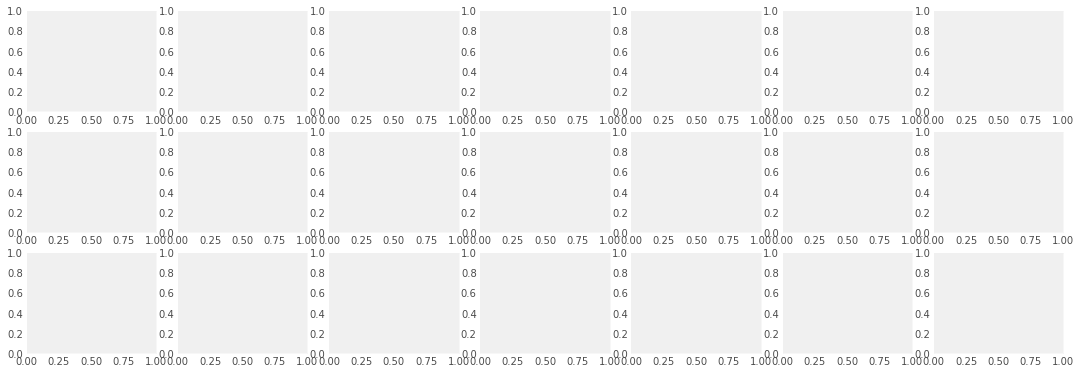

In [2122]:
ncols=7
k=0
w=.3
dw=.05
h=.35
dh=.07

for country in countries_sel:
    r,c=divmod(k,ncols)
    ax=plt.axes([c*(w+dw),-r*(h+dh),w,h])
    k+=1

## first testplots

In [315]:
df['Italy'][-1],df['Germany'][-1]

(35713, 12327)

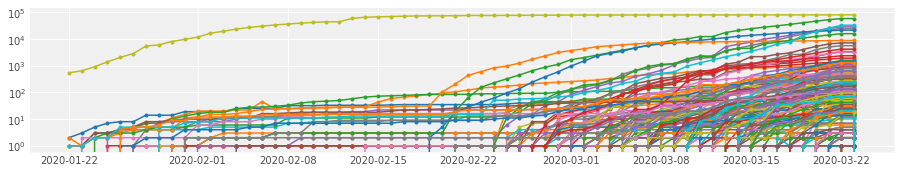

In [2427]:
ax=plt.axes([0,0,2,.5])
for country in df.columns:
    ax.plot(df[country],'.-')
ax.set_yscale('log')
ax.grid(True)

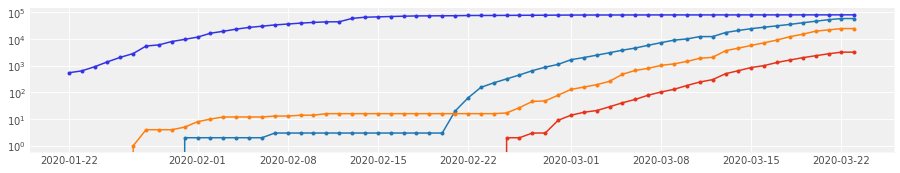

In [2429]:
ax=plt.axes([0,0,2,.5])
ax.plot(df['China'],'.-',c=(.2,.2,.9))
ax.plot(df['Austria'],'.-',c=(.9,.2,.1))
ax.plot(df['Italy'],'.-')
ax.plot(df['Germany'],'.-')

ax.set_yscale('log')
ax.grid(True)

## plot cases vs time

In [826]:
def plot_allcases(ax,df,country):
    
    for col in df.columns:
    
        ind=df[col]>200
        ax.plot(range(len(np.where(ind)[0])),df[ind][col],'.-',ms=1,lw=.5,c='.7',zorder=1)
        if col==country:
            ax.plot(range(len(np.where(ind)[0])),df[ind][col],'.-',ms=7,lw=1,c=(.95,.3,.5),zorder=2)   
    
    
    ax.set_yscale('log')
    ax.set_xlim(0,30)
    ax.grid(True,zorder=-1)
    ax.tick_params(labelsize=7)
    ax.annotate(country,xy=(0,1.01),xycoords='axes fraction',fontsize=9)

In [843]:
len(df),len(deaths_df)

(57, 57)

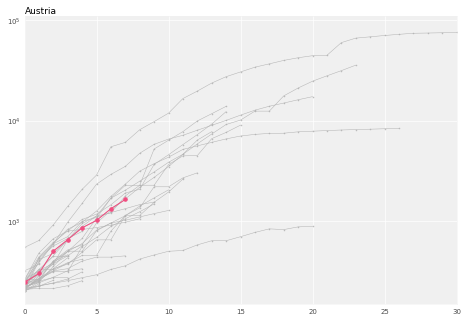

In [827]:
ax=plt.axes([0,0,1,1])
plot_allcases(ax,df,'Austria')

## plot cases and deaths vs time

In [1528]:
def plot_allcases_deaths(ax,df,deaths_df,country):
    
    for col in df.columns:
    
        ind=df[col]>200
        ax.plot(range(len(np.where(ind)[0])),df[ind][col],'.-',ms=1,lw=.5,c='.7',zorder=1)
        if col==country:
            ax.plot(range(len(np.where(ind)[0])),df[ind][col],'.-',ms=7,lw=1,c=(.95,.3,.5),zorder=2) 
            #ax.plot(range(len(np.where(ind)[0])),deaths_df[ind][col],'.-',ms=5,lw=1,c=(.4,.2,.2),zorder=2)
            ax.bar(range(len(np.where(ind)[0])),deaths_df[ind][col],lw=0,width=.5,color=(.4,.4,.4),zorder=1)#,alpha=.8)   
    
    
    ax.set_yscale('log')
    ax.set_xlim(0,35)
    ax.set_ylim(5e1,1e5)
    ax.grid(True,zorder=-1)
    ax.tick_params(labelsize=7)
    ax.annotate(country,xy=(0,1.01),xycoords='axes fraction',fontsize=9)

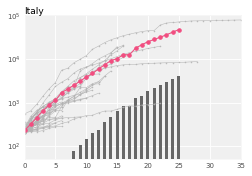

In [1530]:
ax=plt.axes([0,0,.5,.5])
plot_allcases_deaths(ax,df,deaths_df,'Italy')

## relative to population

In [840]:
def plot_all_rel(ax,df,pop_df,country):
    #for col in ['Austria','Germany','Italy','Spain','Portugal','China_all']:#df.columns:
    #for col in df.columns:
    for col in countries_sel:
        
        pop=pop_df[pop_df['Country Name']==col]['2018'].values[0]
            
        ind=df[col]/pop>1e-5
        ax.plot(range(len(np.where(ind)[0])),df[ind][col]/pop,'.-',ms=1,lw=.5,c='.7',zorder=1)
        if col==country:
            ax.plot(range(len(np.where(ind)[0])),df[ind][col]/pop,'.-',ms=7,lw=1,c=(.95,.3,.5),zorder=2)   
        
    ax.set_yscale('log')
    ax.set_xlim(0,30)
    ax.set_ylim(1e-5,1e-3)
    ax.grid(True,zorder=-1)
    ax.tick_params(labelsize=7)
    ax.annotate(country,xy=(0,1.01),xycoords='axes fraction',fontsize=9)

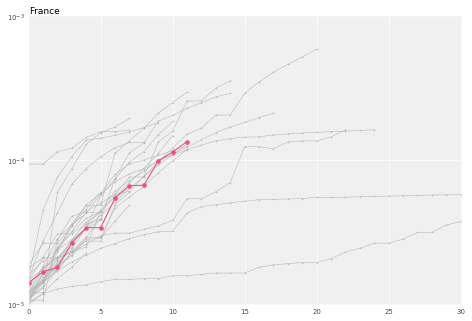

In [841]:
ax=plt.axes([0,0,1,1])
#plot_all_rel(ax,df,pop_df,'Austria')
plot_all_rel(ax,df,pop_df,'France')

## plot newest change bar chart

In [1065]:
rlc_df=pd.DataFrame([lc_df[c]/df[c].iloc[-2] for c in lc_df.index],index=lc_df.index)
rlc_df.head()

C:\Users\axel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in longlong_scalars
  """Entry point for launching an IPython kernel.


,0
Togo,0.0
Belarus,0.0
Somalia,0.0
Nigeria,0.0
Liberia,0.0


In [1057]:
lc_df#/df.iloc[-2]

Togo                0
Belarus             0
Somalia             0
Nigeria             0
Liberia             0
                 ... 
France           1828
Germany          2993
Spain            4053
Italy            5322
United States    5894
Length: 154, dtype: int64

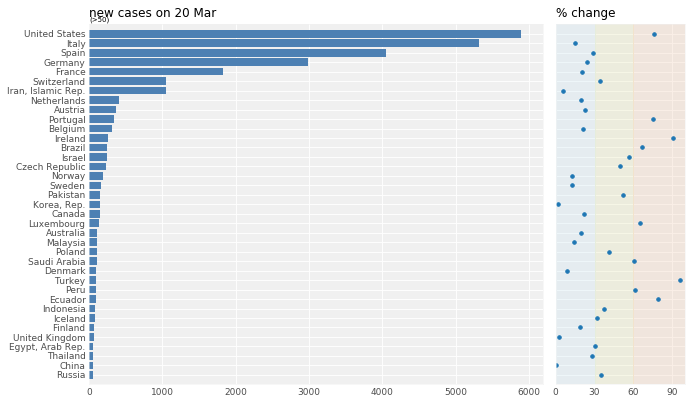

In [1542]:
plt.figure(figsize=[9,5])
ax=plt.axes([0,0,.7,1])

ind=lc_df>50
ax.barh(range(len(lc_df[ind])),lc_df[ind],color=(.3,.5,.7))
ax.set_yticks(np.arange(0,len(lc_df[ind])))
ax.set_yticklabels(lc_df[ind].index)
ax.set_ylim(-1,len(lc_df[ind]))
#ax.set_xscale('log')
ax.grid(axis='both')
ax.tick_params(labelsize=9)
ax.annotate('new cases on '+df.index[-1].strftime('%d %b'),xy=(0,1.02),xycoords='axes fraction',fontsize=12)
ax.annotate('(>50)',xy=(0,1.008),xycoords='axes fraction',fontsize=7)


ax=plt.axes([.72,0,.2,1])

#ax.barh(range(len(lc_df[ind])),100*rlc_df[ind][0].values)
ax.plot(100*rlc_df[ind][0].values,range(len(lc_df[ind])),'.',ms=7)
#ax.plot(100*rlc_df[ind][0].values,range(len(lc_df[ind])),'-')
ax.set_yticks(np.arange(0,len(lc_df[ind])))
ax.set_yticklabels('')
ax.set_ylim(-1,len(lc_df[ind]))

ax.set_xticks([0,30,60,90])
ax.set_xlim(0,100)
ax.grid(axis='both')
ax.tick_params(labelsize=9)
ax.annotate('% change',xy=(0,1.02),xycoords='axes fraction',fontsize=12)

ax.fill_betweenx([-1,50],[0,0],[30,30],color=(.8,.9,.95),alpha=0.3)
ax.fill_betweenx([-1,50],[30,30],[60,60],color=(.9,.9,.7),alpha=0.3)
ax.fill_betweenx([-1,50],[60,60],[100,100],color=(.95,.8,.7),alpha=0.3)

## combined bar chart

In [2102]:
def legend_cdr(ax,df):
    #for k in np.arange(9,-1,-1):
    r=np.arange(-1,-11,-1)
    for j in r[::-1]:
        if j==-1:
            color1=(.25,.1,.1)
            color2=(.1,.05,.35)
        else:
            color1=cmap1(abs(j))#cmap1(10-k)
            color2=cmap2(abs(j)+1)
        
        ax.barh(2,j,color=color1)
        ax.barh(1,j,color=color2)
        ax.plot(-.5,0,'o',c=(.2,.7,.2),ms=5)
    ax.set_xticks([s+.5 for s in r])
    ax.set_xticklabels([abs(s+1) for s in r])

    ax.set_yticks([0,1,2])
    ax.set_yticklabels(['recoveries','deaths','cases'])

    ax.set_ylim(-.5,2.5)
    ax.set_xlabel('days before '+df.index[-1].strftime('%d %b %Y'),color='.2')
    #ax.annotate('Number of cases, deaths and recoveries for last 10 days \n'+df.index[-1].strftime('%d %b %Y'),
    #                xy=(0.05,1),xycoords='axes fraction',va='bottom')

def plot_scale(ax):
    ax.hlines(20,1e4,2e4,lw=4,color='.3')
    ax.hlines(20,2.1e4,3e4,lw=4,color='.3')
    ax.hlines(20,3.1e4,4e4,lw=4,color='.3')
    ax.hlines(20,4.1e4,5e4,lw=4,color='.3')
    ax.annotate('100',xy=(1e4,20.2),xycoords='data',va='bottom',ha='left')
    ax.annotate('50',xy=(2e4,20.2),xycoords='data',va='bottom',ha='left')
    ax.annotate('33',xy=(3e4,20.2),xycoords='data',va='bottom',ha='left')
    ax.annotate('25',xy=(4e4,20.2),xycoords='data',va='bottom',ha='left')

    ax.annotate('increase (%)',xy=(1e4,18.8),xycoords='data',va='bottom',ha='left')

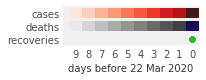

In [2103]:
plt.figure(figsize=[9,9])
ax_leg=plt.axes([.1,1.07,.21,.06])
legend_cdr(ax_leg,df)

In [2434]:
df.iloc[-1].sort_values(ascending=False).index.values[0:50]

array(['China', 'Italy', 'United States', 'Spain', 'Germany',
       'Iran, Islamic Rep.', 'France', 'Korea, Rep.', 'Switzerland',
       'United Kingdom', 'Netherlands', 'Belgium', 'Austria', 'Norway',
       'Sweden', 'Portugal', 'Brazil', 'Canada', 'Denmark', 'Australia',
       'Malaysia', 'Turkey', 'Czech Republic', 'Japan', 'Israel',
       'Ireland', 'Luxembourg', 'Ecuador', 'Pakistan', 'Poland', 'Chile',
       'Finland', 'Greece', 'Thailand', 'Iceland', 'Indonesia',
       'Saudi Arabia', 'Qatar', 'Singapore', 'Romania', 'Slovenia',
       'India', 'Philippines', 'Russia', 'Peru', 'Bahrain',
       'Egypt, Arab Rep.', 'Estonia', 'South Africa', 'Croatia'],
      dtype=object)

In [2108]:
def plot_covid19_bars(df,deaths_df,recov_df,countries_sel2,saveplot):
    
    cmap1=plt.get_cmap('Reds_r',12)
    cmap2=plt.get_cmap('gray',13)
    cmap3=plt.get_cmap('Greens_r',13)

    #plt.figure(figsize=[9,9])
    ax=plt.axes([0,0,1,1])

    k=0

    for country in countries_sel2[::-1]:
        for j in np.arange(-1,-11,-1):
            #print(j)
            if j==-1:
                color1=(.25,.1,.1)
                color2=(.1,.05,.35)
            else:
                color1=cmap1(abs(j))
                color2=cmap2(abs(j)+1)
            if j==-10:
                color1='.89'
                color2='.89'

            ax.barh(k,df[country].iloc[j],color=color1,lw=0,ec='.5')
            ax.barh(k,deaths_df[country].iloc[j],color=color2,zorder=3,lw=0,ec='.5')
            #ax.barh(k,recov_df[country].iloc[j],height=.4, align='edge',color=color3,zorder=4)

        ax.plot(recov_df[country].iloc[-1],k,'o',ms=5.5,color=(.1,.7,.2),zorder=4)

        ax.annotate(country,xy=(1.05*df[country].iloc[-1],k),xycoords='data',fontsize=9,va='center',color='.2')

        k+=1

    #ax.set_yticks(np.arange(0,len(countries_sel2)))
    #ax.set_yticklabels(countries_sel2[::-1])
    ax.set_yticklabels('')
    ax.set_ylim(-1,len(countries_sel2))

    ax.set_xscale('log')
    ax.set_xticks([1e1,1e2,1e3,1e4,1e5])
    ax.set_xticks(list(np.arange(0,10,1))+list(np.arange(10,100,10))+list(np.arange(100,1000,100))
                  +list(np.arange(1e3,1e4,1e3))
                 +list(np.arange(1e4,1e5,1e4))+[1e5],minor=True)
    ax.set_xlim(7,1.2e5)
    #ax.ticklabel_format(style='plain')
    #for axis in [ax.xaxis, ax.yaxis]:
    #    axis.set_major_formatter(ScalarFormatter())
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.grid(True, which='major',lw=1)
    ax.grid(True, which='minor',lw=.5)

    #ax.annotate('Number of cases, deaths and recoveries for last 10 days \n'+df.index[-1].strftime('%d %b %Y'),
    #                xy=(0.05,1),xycoords='axes fraction',va='bottom')

    #ax_leg=plt.axes([.1,1.07,.21,.06])
    ax_leg=plt.axes([1-.21,1.06,.21,.06])
    legend_cdr(ax_leg,df)
    plot_scale(ax)

    ax.annotate('data source: https://github.com/CSSEGISandData/COVID-19',
                xy=(1e5,-.2),xycoords='data',va='top',ha='right',fontsize=6)
    
    if saveplot:
        plt.savefig(projectpath+'covid19_bars_'+df.index[-1].strftime('%Y%m%d')+'.png',bbox_inches='tight',dpi=600)

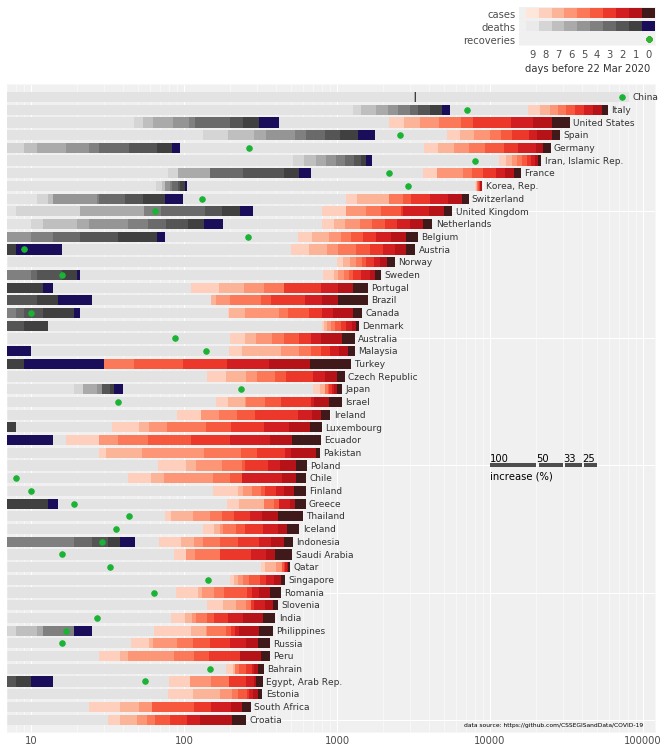

In [2109]:
#latest
saveplot=True
countries_sel2=df.iloc[-1].sort_values(ascending=False).index.values[0:50]
plt.figure(figsize=[9,9])
plot_covid19_bars(df=df.iloc[10::],deaths_df=deaths_df.iloc[10::],recov_df=recov_df.iloc[10::],countries_sel2=countries_sel2,saveplot=saveplot)

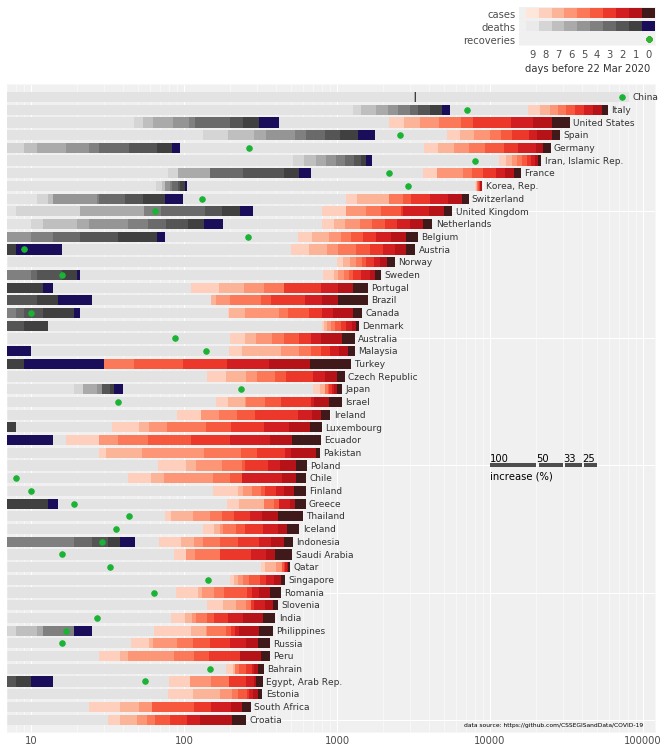

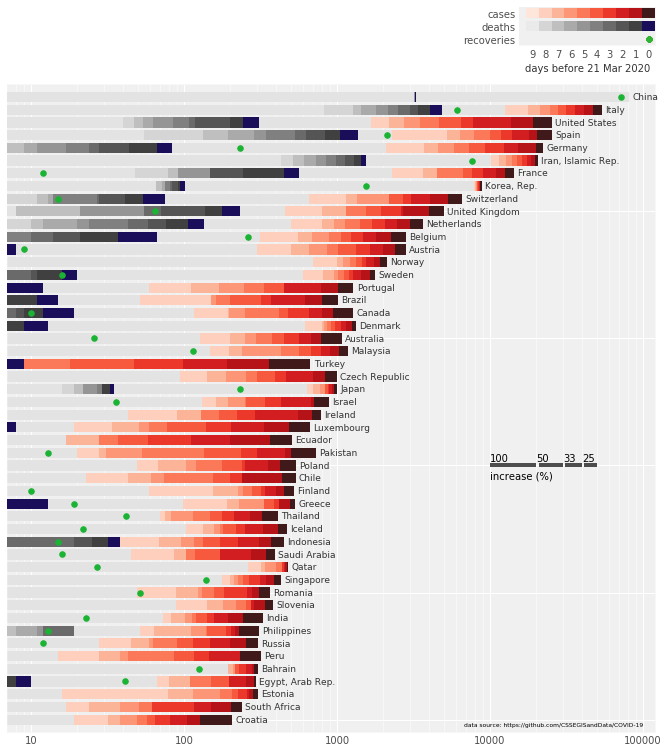

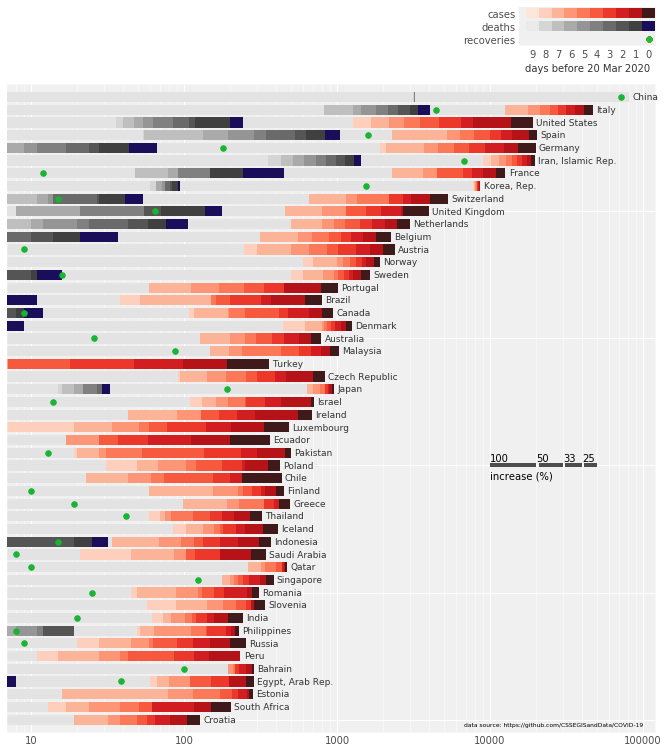

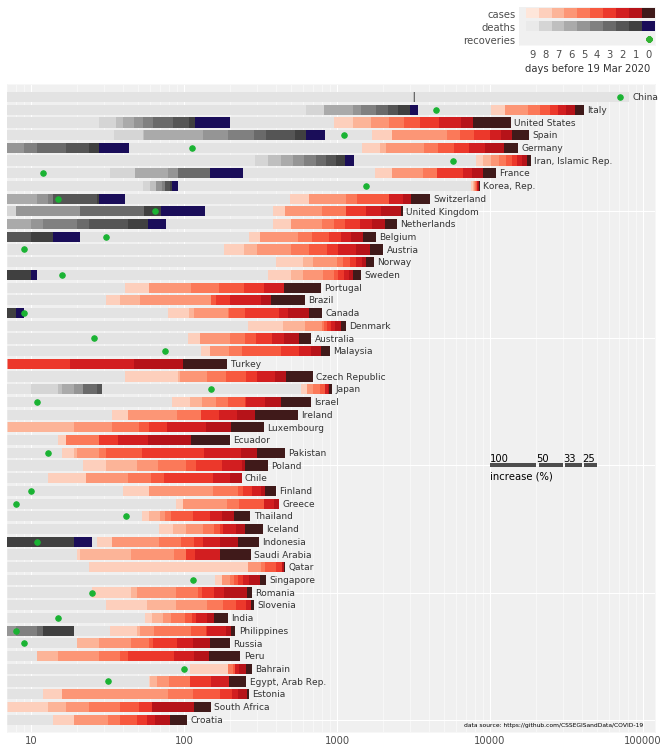

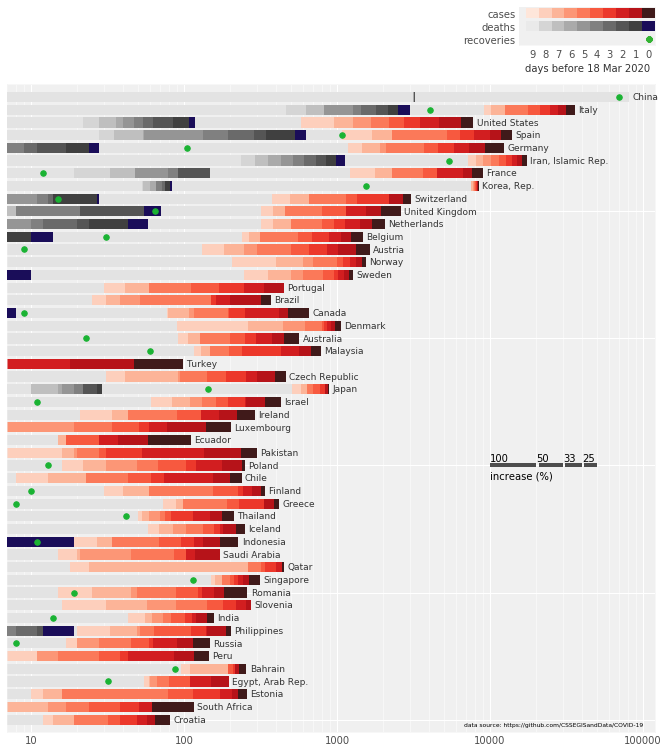

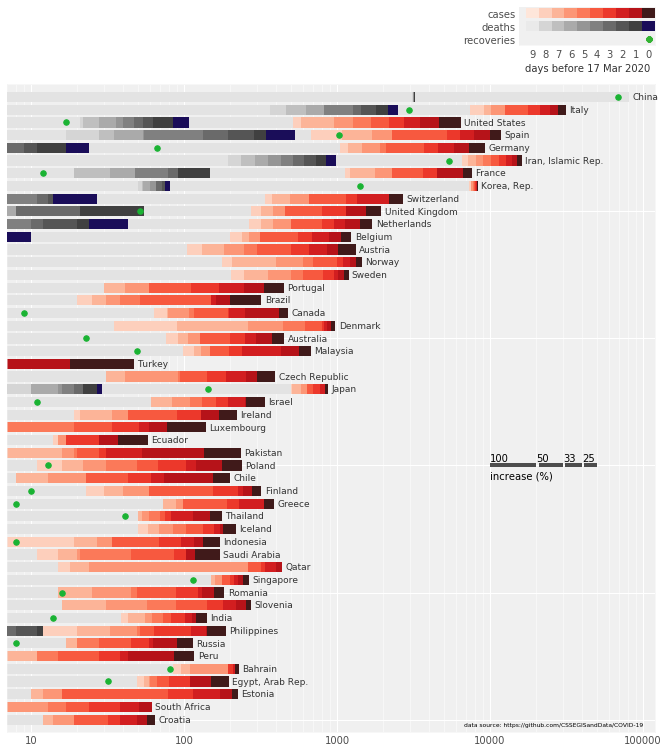

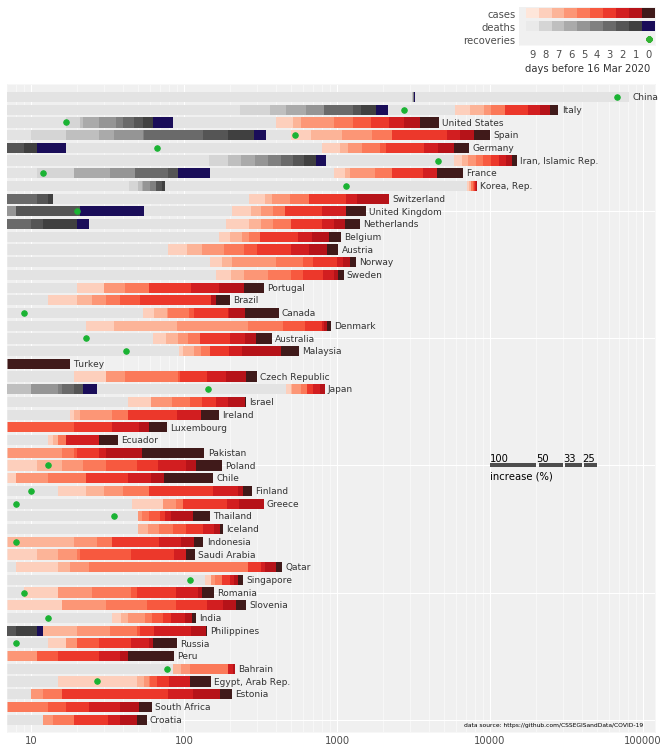

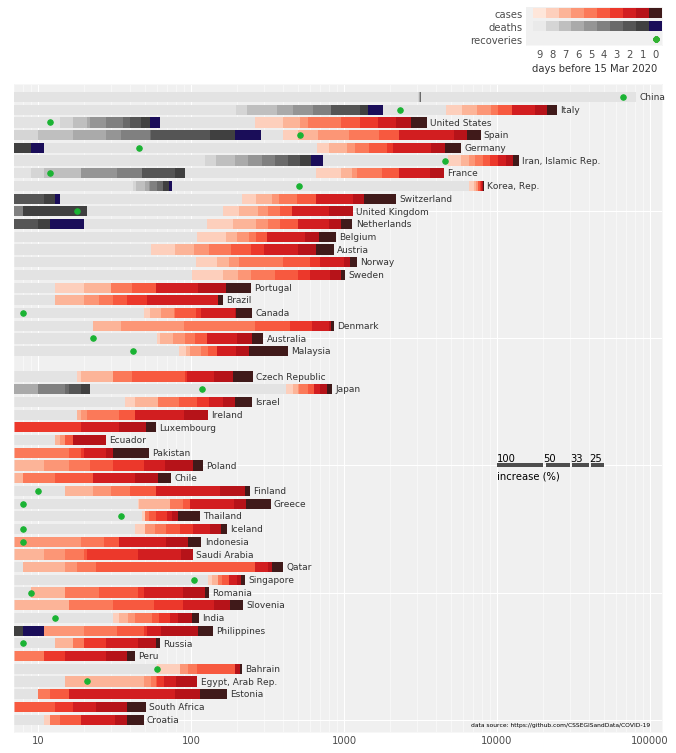

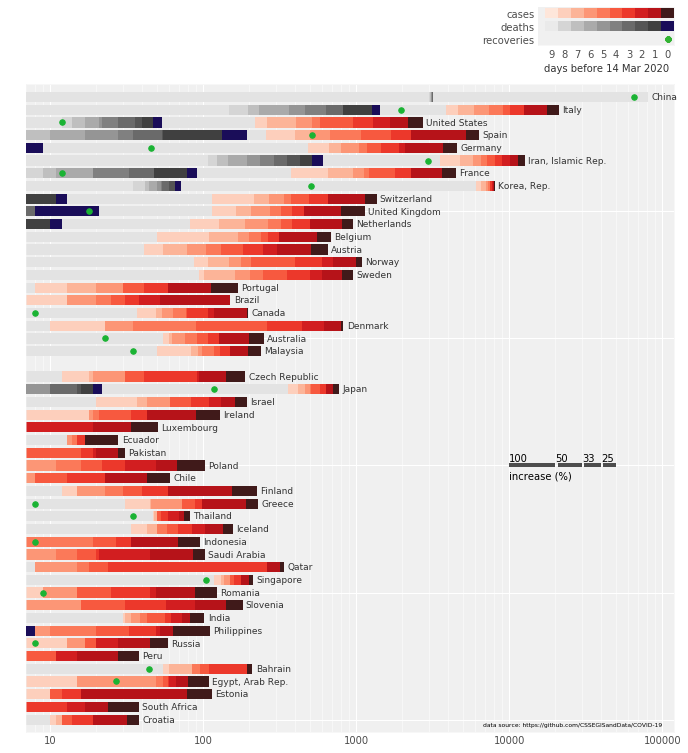

In [2113]:
saveplot=True
countries_sel2=df.iloc[-1].sort_values(ascending=False).index.values[0:50]
for k in np.arange(1,10):
    plt.figure(figsize=[9,9])

    #countries_sel2=df.iloc[-k].sort_values(ascending=False).index.values[0:50]
    if k==1:
        plot_covid19_bars(df=df.iloc[10::],deaths_df=deaths_df.iloc[10::],recov_df=recov_df.iloc[10::],countries_sel2=countries_sel2,saveplot=saveplot)
    else:
        plot_covid19_bars(df=df.iloc[10:-(k-1)],deaths_df=deaths_df.iloc[10:-(k-1)],recov_df=recov_df.iloc[10:-(k-1)],countries_sel2=countries_sel2,saveplot=saveplot)

## try animation

In [2105]:
import matplotlib.animation as animation
from IPython.display import HTML

In [2111]:
def draw_barchart(k):
    
    ax.clear()
    saveplot=False
    #countries_sel2=df.iloc[-1].sort_values(ascending=False).index.values[0:50]
    
    countries_sel2=df.iloc[-k].sort_values(ascending=False).index.values[0:50]
    if k==1:
        plot_covid19_bars(df=df.iloc[10::],deaths_df=deaths_df.iloc[10::],recov_df=recov_df.iloc[10::],countries_sel2=countries_sel2,saveplot=saveplot)
    else:
        plot_covid19_bars(df=df.iloc[10:-(k-1)],deaths_df=deaths_df.iloc[10:-(k-1)],recov_df=recov_df.iloc[10:-(k-1)],countries_sel2=countries_sel2,saveplot=saveplot)

C:\Users\axel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


ValueError: min() arg is an empty sequence

C:\Users\axel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\ticker.py:2707: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)
C:\Users\axel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\ticker.py:2707: RuntimeWarning: invalid value encountered in double_scalars
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


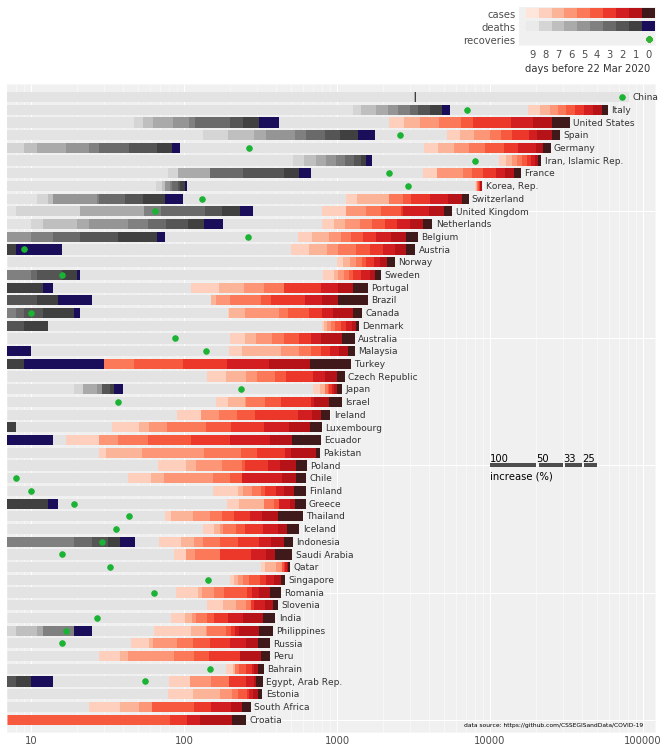

In [2119]:
fig, ax = plt.subplots(figsize=(9,9))
#fig=plt.figure(figsize=[9,9])

animator = animation.FuncAnimation(fig, draw_barchart, frames=np.arange(1,5))
HTML(animator.to_jshtml()) 
#HTML(animator.to_html5_video()) 
# or use animator.to_html5_video() or animator.save()
#animator.save(projectpath+'test')

In [2005]:
df.index[-1]

Timestamp('2020-03-20 00:00:00')

In [2043]:
deaths_df.iloc[10:-1]

,Thailand,Japan,Singapore,Nepal,Malaysia,Cambodia,Sri Lanka,Germany,Finland,United Arab Emirates,...,Papua New Guinea,Zimbabwe,Cape Verde,East Timor,Eritrea,Uganda,China,United States,Canada,Australia
2020-02-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,259,0,0,0
2020-02-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,361,0,0,0
2020-02-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,425,0,0,0
2020-02-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,491,0,0,0
2020-02-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,563,0,0,0
2020-02-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,633,0,0,0
2020-02-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,718,0,0,0
2020-02-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,805,0,0,0
2020-02-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,905,0,0,0
2020-02-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1012,0,0,0


In [2011]:
deaths_df.tail(2)

,Thailand,Japan,Singapore,Nepal,Malaysia,Cambodia,Sri Lanka,Germany,Finland,United Arab Emirates,...,Papua New Guinea,Zimbabwe,Cape Verde,East Timor,Eritrea,Uganda,China,United States,Canada,Australia
2020-03-20,1,33,0,0,3,0,0,67,0,2,...,0,0,0,0,0,0,3253,244,12,7
2020-03-21,1,35,2,0,4,0,0,84,1,2,...,0,0,0,0,0,0,3259,307,19,7


In [1868]:
recov_df['Italy'].iloc[-1]

4440

In [1534]:
df['Turkey'].tail()

2020-03-16     18
2020-03-17     47
2020-03-18     98
2020-03-19    192
2020-03-20    359
Name: Turkey, dtype: int64

## alternative encodings

In [1216]:
cmap=plt.get_cmap('viridis',8)

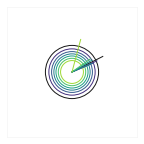

In [1223]:
country='Italy'
#country='Austria'

plt.figure(figsize=[9,9])
ax=plt.axes([0,0,.2,.2])
k=0
for d in np.arange(-1,-8,-1):
    if k==0:
        c='.1'
    else:
        c=cmap(k)
    
    r=np.sqrt(np.log(df[country][d]))
    r=df[country][d]
    #print(r)
    c1 = plt.Circle((0, 0), r, fc='none',lw=1, ec=c,alpha=1)
    ax.add_artist(c1)
    
    addcases=df[country][d]-df[country][d-1]
    relchange=(df[country][d]-df[country][d-1])/df[country][d-1]
    #print(relchange)
    #print(addcases,relchange)
    x=1e1*addcases*np.cos(relchange*np.pi)
    y=1e1*addcases*np.sin(relchange*np.pi)
    ax.plot([0,x],[0,y],'-',c=c,lw=1)
    
    k+=1
    
lim=5e1
lim=1e1
lim=1e5
ax.set_xlim(-lim,lim)
ax.set_ylim(-lim,lim)

ax.set_xticklabels('')
ax.set_yticklabels('')
ax.set_facecolor('1')

In [1422]:
def add_wedge_fix(ax):
    
    lw=0
    fill=True
    wedge0 = Wedge(center=(.5,.5),
                  r=.22, theta1=0, theta2=90,
                  width=.22,
                linestyle='--', lw=lw,
                  fill=fill, fc='.95',ec='.5',
                 transform=ax.transAxes,zorder=0)
    
    wedge1 = Wedge(center=(.5,.5),
                  r=.45, theta1=0, theta2=90,
                  width=.45,
                linestyle='--', lw=lw,
                  fill=fill, fc='.95',ec='.5',
                 transform=ax.transAxes,zorder=-1)
    wedge2 = Wedge(center=(.5,.5),
                  r=.45, theta1=20, theta2=40,
                  width=.45,
                linestyle='--', lw=lw,
                  fill=fill, fc='.92',ec='.4',
                 transform=ax.transAxes,zorder=0)
    
    
    ax.add_artist(wedge1)
    ax.add_artist(wedge2)

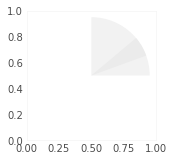

In [1425]:
plt.figure(figsize=[9,9])
ax=plt.axes([0,0,.2,.2])
add_wedge_fix(ax)
ax.set_facecolor('1')

In [1484]:
def add_wedge(ax,r,theta1,theta2,fc,alpha):
    
    lw=0
    fill=True
    wedge = Wedge(center=(.5,.5),
                  r=r, theta1=theta1, theta2=theta2,
                  width=r,
                linestyle='--', lw=lw,
                  fill=fill, fc=fc,ec='.5',
                 transform=ax.transAxes,zorder=0,alpha=alpha)
    ax.add_artist(wedge)
    

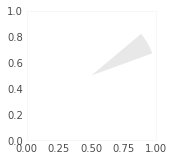

In [1485]:
plt.figure(figsize=[9,9])
ax=plt.axes([0,0,.2,.2])
add_wedge(ax,.5,20,40,'.9',.9)
ax.set_facecolor('1')

In [1429]:
d_range=np.arange(-1,-8,-1)

np.max([(df[country][d]-df[country][d-1])/df[country][d-1] for d in d_range])

0.5842696629213483

In [1544]:
def plot_glyphs(ax,df,country):
    
    d_range=np.arange(-1,-8,-1)
    k=0
    for d in d_range:
        if k==0:
            c='.1'
            lw=1.5
            a=1
        else:
            c=cmap(k)
            a=.3
            lw=1
        
        #r=df[country][d]
        r=np.log(df[country][d])
        #r=np.sqrt(np.log(df[country][d]))
        #print(r)
        circ = plt.Circle((0, 0), r, fc='none',lw=1, ec=c,alpha=a)
        ax.add_artist(circ)

        addcases=df[country][d]-df[country][d-1]
        relchange=(df[country][d]-df[country][d-1])/df[country][d-1]
        r2=2e0*np.log(addcases)
        #print(r2)
        #print(relchange)
        #print(addcases,relchange)
        x=r2*np.cos(relchange*np.pi/2)
        y=r2*np.sin(relchange*np.pi/2)
        ax.plot([0,x],[0,y],'-',c=c,lw=lw,alpha=a)

        k+=1

    lim=5e1
    lim=2e1#log
    #lim=5e0#sqrtlog
    #lim=1e5#lin
    ax.set_xlim(-lim,lim)
    ax.set_ylim(-lim,lim)

    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.set_facecolor('1')
    
    ax.annotate(country,xy=(0,1.02),xycoords='axes fraction',fontsize=9)
    #add_wedge_fix(ax)
    
    addcases_latest=df[country][-1]-df[country][-2]
    relchange_latest=(df[country][-1]-df[country][-2])/df[country][-2]
    relchanges=[(df[country][d]-df[country][d-1])/df[country][d-1] for d in d_range]
    #print(2e0*np.log(addcases_latest)/lim,r2)
    if relchanges[0]>relchanges[1]:
        fc=(.95,.3,.1)
    else:
        fc=(.2,.5,.9)
    
    fc='.91'
    add_wedge(ax,2e0*np.log(addcases_latest)/lim/2,np.min(relchanges)*90,np.max(relchanges)*90,'.95',1)
    add_wedge(ax,2e0*np.log(addcases_latest)/lim/2,np.min([relchanges[0]*90,relchanges[1]*90]),
              np.max([relchanges[0]*90,relchanges[1]*90]),fc,.5)
    #print(relchanges[-1],relchanges[-2])

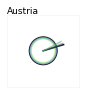

In [1545]:
country='Italy'
country='Austria'
#country='United States'

plt.figure(figsize=[5,5])
ax=plt.axes([0,0,.2,.2])
plot_glyphs(ax,df,country)

C:\Users\axel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
C:\Users\axel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\axel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log


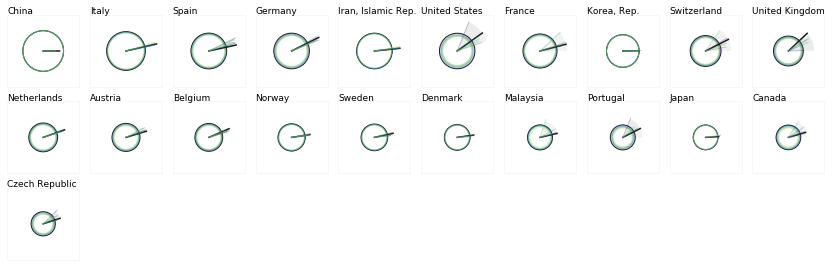

In [1731]:
ncols=10
k=0
w=.2
dw=.03
h=.2
dh=.04
plt.figure(figsize=[5,5])

for country in countries_sel:
    r,c=divmod(k,ncols)
    ax=plt.axes([c*(w+dw),-r*(h+dh),w,h])
    plot_glyphs(ax,df,country)
    
    k+=1
    
#plt.savefig(projectpath+'covid_19_glyphs'+df.index[-1].strftime('%Y%m%d')+'.png',bbox_inches='tight',dpi=600)

## plot cases vs deaths

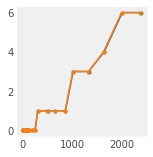

In [1697]:
plt.figure(figsize=[9,9])
ax=plt.axes([0,0,.2,.2])

ax.plot(df['Austria'],deaths_df['Austria'],'.-')
ax.plot(active_df['Austria'],deaths_df['Austria'],'.-')

In [1726]:
def plot_cases_deaths(ax,df,deaths_df,country):
    
    x=np.array([1e1,1e5])
    #x=np.arange(1,1e5)
    #ax.plot(x,x/100,'.-',color='.1',lw=1)
    ax.fill_between(x,x/.001,color='.98',lw=1,zorder=-3)
    ax.fill_between(x,x/.01,color='.96',lw=1,zorder=-3)
    ax.fill_between(x,x/.1,color='.94',lw=1,zorder=-3)
    ax.fill_between(x,x/1,color='.92',lw=1,zorder=-3)
    ax.fill_between(x,x/10,color='.90',lw=1,zorder=-3)
    ax.fill_between(x,x/100,color='.86',lw=1,zorder=-2)
    ax.fill_between(x,x/1000,color='.84',lw=1,zorder=-2)
    ax.fill_between(x,x/10000,color='.82',lw=1,zorder=-2)
    
    ax.plot(df,deaths_df,'.-',c='.5',lw=.2,ms=1,alpha=.5,zorder=2)
    ax.scatter(df[country],deaths_df[country],marker='o',facecolor='none',ec=(.95,.3,.4),lw=2,s=6,alpha=1,zorder=3)
    #ax.scatter(active_df[country],deaths_df[country],marker='o',facecolor='none',ec=(.95,.3,.4),lw=2,s=6,alpha=1,zorder=4)
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_yticks([1e1,1e2,1e3])
    ax.set_xticks([1e1,1e3,1e5])
    ax.set_xlim([1e1,1e5])
    ax.set_ylim([1e0,1e4])
    
    ax.tick_params(labelsize=9)
    ax.annotate(country,xy=(0,1.01),xycoords='axes fraction',fontsize=9)
    ax.grid(True)

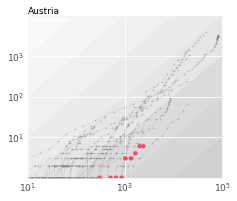

In [1727]:
plt.figure(figsize=[9,9])
ax=plt.axes([0,0,.3,.25])
country='Austria'
plot_cases_deaths(ax,df,deaths_df,country)

In [2120]:
countries_sel=df.iloc[-1].sort_values(ascending=False).index.values[0:21]
countries_sel

array(['China', 'Italy', 'United States', 'Spain', 'Germany',
       'Iran, Islamic Rep.', 'France', 'Korea, Rep.', 'Switzerland',
       'United Kingdom', 'Netherlands', 'Belgium', 'Austria', 'Norway',
       'Sweden', 'Portugal', 'Brazil', 'Canada', 'Denmark', 'Australia',
       'Malaysia'], dtype=object)

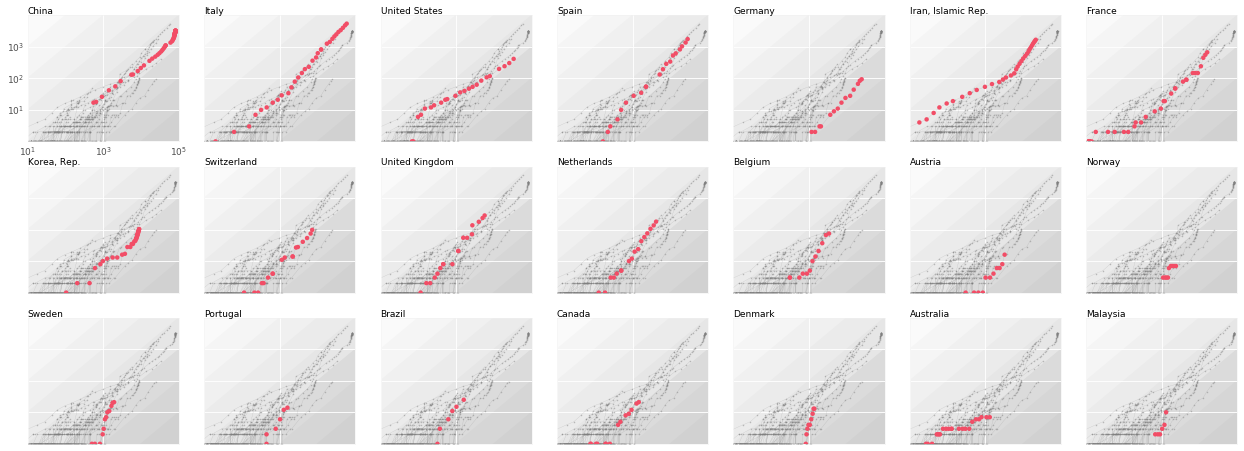

In [2121]:
ncols=7
k=0
w=.3
dw=.05
h=.25
dh=.05
plt.figure(figsize=[7,7])

for country in countries_sel:
    r,c=divmod(k,ncols)
    ax=plt.axes([c*(w+dw),-r*(h+dh),w,h])
    plot_cases_deaths(ax,df,deaths_df,country)
    if k>0:
        ax.set_xticklabels('')
        ax.set_yticklabels('')
    k+=1
    
plt.savefig(projectpath+'covid19_casesvsdeaths_'+df.index[-1].strftime('%Y%m%d')+'.png',bbox_inches='tight',dpi=600)

In [1191]:
df[country].tail(14)

2020-03-06     4636
2020-03-07     5883
2020-03-08     7375
2020-03-09     9172
2020-03-10    10149
2020-03-11    12462
2020-03-12    12462
2020-03-13    17660
2020-03-14    21157
2020-03-15    24747
2020-03-16    27980
2020-03-17    31506
2020-03-18    35713
2020-03-19    41035
Name: Italy, dtype: int64

In [1707]:
df['Italy'][-1],deaths_df['Italy'][-1],deaths_df['Italy'][-1]/df['Italy'][-1]

(47021, 4032, 0.08574892069500861)

In [1730]:
deaths_df['Czech Republic'][-1]

0

In [1711]:
deaths_df['Italy'][-10]/df['Italy'][-10]

0.06636173968865351

## plot rates

In [2334]:
country='Italy'
country='Austria'
#country='China'
k=-2
rate=(df[country][k]-df[country][k-1])/df[country][k]
rate

0.1513859275053305

In [2320]:
(active_df[country][k]-active_df[country][k-1])/active_df[country][k]

-0.07261698440207973

In [2201]:
rate_df=df.diff()/df*100
rate_df[country]

2020-01-22          NaN
2020-01-23          NaN
2020-01-24          NaN
2020-01-25          NaN
2020-01-26          NaN
                ...    
2020-03-18     5.179283
2020-03-19    29.295775
2020-03-20    16.470588
2020-03-21    20.708955
2020-03-22    15.457413
Name: Poland, Length: 61, dtype: float64

In [2312]:
rate_df_14=rate_df[-11::]

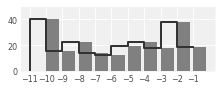

In [2313]:
fig=plt.figure(figsize=(9,9))
ax=plt.axes([0,0,.3,.1])

#ax.plot(np.arange(-len(rate_df_14),0,1),rate_df_14[country],'.-',c='.2',ms=7,lw=.2)
ax.bar(np.arange(-len(rate_df_14),0,1),rate_df_14[country],color='.5',align='edge')
        
ax.step(np.arange(-len(rate_df_14),0,1),rate_df_14[country],'-',c='.2',lw=2)
ax.set_xticks(np.arange(-len(rate_df_14),0,1))
ax.set_ylim(0,50)

ax.tick_params(labelsize=8)
ax.grid(True)

In [2400]:
def plot_rate_country_legend(ax):
    
    steps=np.arange(50,0,-5)
    cmap_bars=plt.get_cmap('Reds_r',len(steps)+1)

    k=0
    for step in steps:
        bar_hs=[min(r,step) for r in [50]]
        ax.bar([-10.5],bar_hs,color=cmap_bars(k),align='edge')#,zorder=k)
        k+=1
    
    ax.set_xticks(np.arange(-len(rate_df_14),0,1))
    ax.set_xlim(-len(rate_df_14),0)
    
    ax.set_yticks(np.arange(0,70,10))
    ax.set_ylim(0,60)
    
    #ax.set_xticklabels('')
    #ax.set_yticklabels('')
    ax.set_xlabel('days before '+df.index[-1].strftime('%d %b %Y'),color='.2')
    ax.tick_params(labelsize=8)
    ax.grid(True, which='major',lw=.5)
    
    #ax.annotate('country',xy=(0,1.03),xycoords='axes fraction',fontsize=9)
    
    ax.annotate('increase of cases\nper day (%) ',xy=(.16,.6),xycoords='axes fraction',fontsize=11)

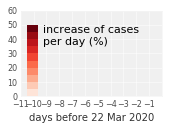

In [2401]:
plt.figure(figsize=[7,7])
ax=plt.axes([0,0,.28,.17])
plot_rate_country_legend(ax)

In [2363]:
def plot_rate_country(ax,df,country):
    
    rate_df=df.diff()/df*100
    rate_df_14=rate_df[-11::]
    
    #ax.plot(np.arange(-len(rate_df_14),0,1),rate_df_14[country],'.-',c='.2',ms=7,lw=.2)
    #ax.step(np.arange(-len(rate_df_14),0,1),rate_df_14[country],'-',c='.2',lw=2)
    #ax.bar(np.arange(-len(rate_df_14),0,1),rate_df_14[country],color='.5',align='edge')
    days=np.arange(-len(rate_df_14),0,1)
    steps=np.arange(50,0,-5)
    cmap_bars=plt.get_cmap('Reds_r',len(steps)+1)

    k=0
    for step in steps:
        bar_hs=[min(r,step) for r in rate_df_14[country].values]
        ax.bar(days,bar_hs,color=cmap_bars(k),align='edge')#,zorder=k)
        k+=1
    
    ax.set_xticks(np.arange(-len(rate_df_14),0,1))
    #ax.set_xlim(0,60)
    
    ax.set_yticks(np.arange(0,70,10))
    ax.set_ylim(0,60)
    
    ax.set_xticklabels('')
    ax.set_yticklabels('')
        
    ax.tick_params(labelsize=8)
    ax.grid(True, which='major',lw=.5)
    
    ax.annotate(country,xy=(0,1.03),xycoords='axes fraction',fontsize=9)

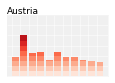

In [2332]:
country='Austria'
plt.figure(figsize=[7,7])
ax=plt.axes([0,0,.2,.12])
plot_rate_country(ax,df,country)

In [2396]:
countries_sel3=df.iloc[-1].sort_values(ascending=False).index.values[0:70]

C:\Users\axel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app


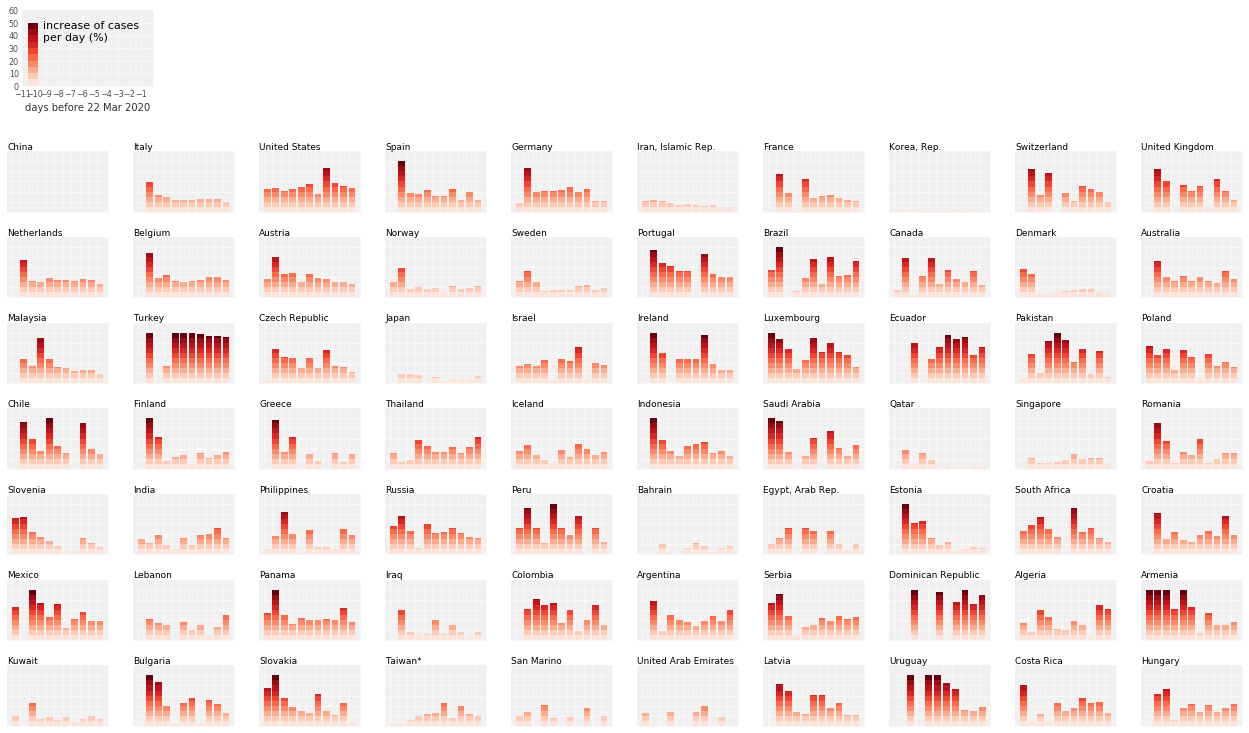

In [2402]:
ncols=10
k=0
w=.2
dw=.05
h=.12
dh=.05
plt.figure(figsize=[7,7])

ax=plt.axes([.03,0.25,.26,.15])
plot_rate_country_legend(ax)

k=0
for country in countries_sel3:
    r,c=divmod(k,ncols)
    ax=plt.axes([c*(w+dw),-r*(h+dh),w,h])
    #plot_rate_country(ax,active_df,country)
    plot_rate_country(ax,df,country)
    #if k>-1:
    #    ax.set_xticklabels('')
    #    ax.set_yticklabels('')
    k+=1
    
plt.savefig(projectpath+'covid19_rates_'+df.index[-1].strftime('%Y%m%d')+'.png',bbox_inches='tight',dpi=600)

## final plots

In [2437]:
df,deaths_df,recov_df,active_df=update_data()

time_series_19-covid-Confirmed.csv
time_series_19-covid-Deaths.csv
time_series_19-covid-Recovered.csv


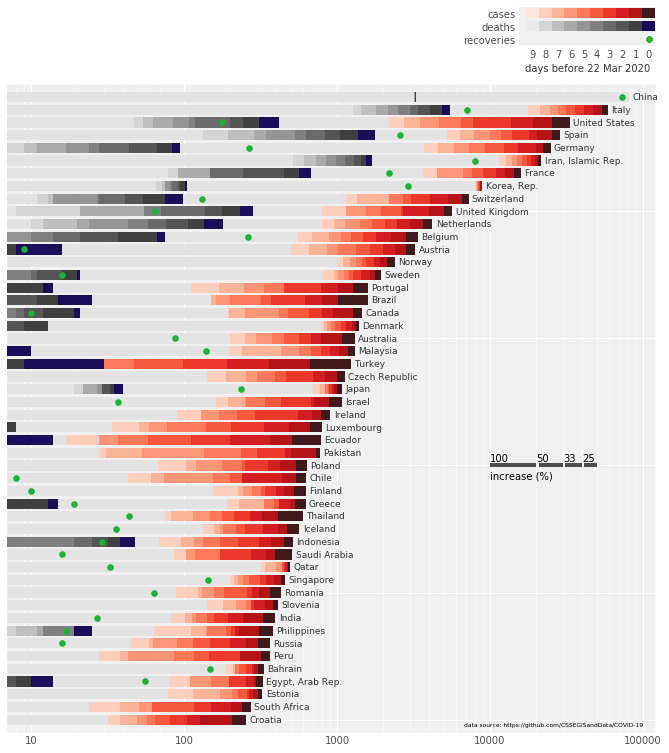

In [2445]:
#latest, NB dataset not updated anymore since 23.3.!
k=2
saveplot=False
countries_sel2=df.iloc[-k].sort_values(ascending=False).index.values[0:50]
plt.figure(figsize=[9,9])
plot_covid19_bars(df=df.iloc[10:-1],deaths_df=deaths_df.iloc[10:-1],recov_df=recov_df.iloc[10::],countries_sel2=countries_sel2,saveplot=saveplot)

In [2125]:
countries_sel=df.iloc[-1].sort_values(ascending=False).index.values[0:35]
countries_sel

array(['China', 'Italy', 'United States', 'Spain', 'Germany',
       'Iran, Islamic Rep.', 'France', 'Korea, Rep.', 'Switzerland',
       'United Kingdom', 'Netherlands', 'Belgium', 'Austria', 'Norway',
       'Sweden', 'Portugal', 'Brazil', 'Canada', 'Denmark', 'Australia',
       'Malaysia', 'Turkey', 'Czech Republic', 'Japan', 'Israel',
       'Ireland', 'Luxembourg', 'Ecuador', 'Pakistan', 'Poland', 'Chile',
       'Finland', 'Greece', 'Thailand', 'Iceland'], dtype=object)

In [989]:
def legend(ax):
    
    
    ax.plot(np.linspace(0.2,.8,6),[0.3,1.3,2,3,4,4.5],'.-',ms=7,lw=1,c=(.95,.3,.5),zorder=2) 
    ax.bar(np.linspace(5,5.5,4),[.5,2,3,3.5],lw=0,width=.11,color=(.4,.4,.4),zorder=1)#,alpha=.8)

    ax.annotate('Number of cases\nvs days since 200th case\n'+df.index[-1].strftime('%d %b %Y'),
                xy=(0.05,1),xycoords='axes fraction',va='top')
    ax.annotate('Number of deaths',xy=(0.22,1),xycoords='axes fraction',va='top')
    ax.set_xlim(0,20)
    ax.set_ylim(0,5)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.set_facecolor('1')

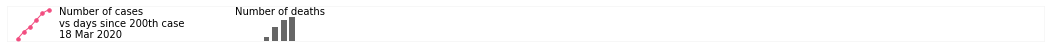

In [990]:
ax=plt.axes([0,.45,ncols*(w+dw)-dw,.12])
legend(ax)

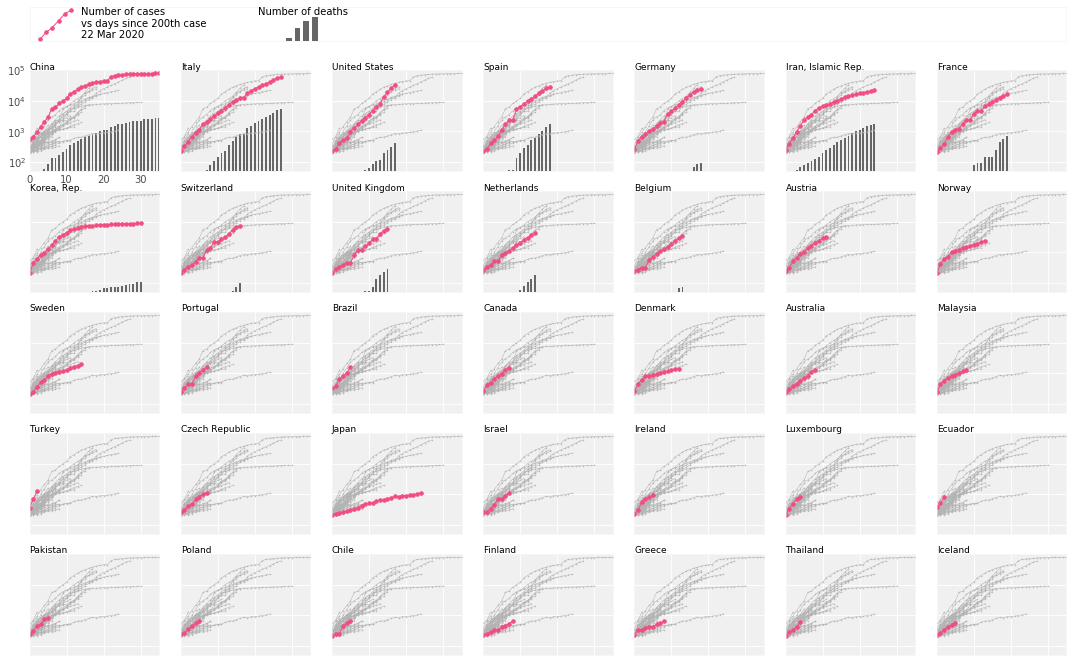

In [2126]:
ncols=7
k=0
w=.3
dw=.05
h=.35
dh=.07

for country in countries_sel[0:35]:
    r,c=divmod(k,ncols)
    ax=plt.axes([c*(w+dw),-r*(h+dh),w,h])
    plot_allcases_deaths(ax,df,deaths_df,country)
    ax.tick_params(labelsize=10)
    if k>0:
        ax.set_xticklabels('')
        ax.set_yticklabels('')
    
    k+=1

ax=plt.axes([0,.45,ncols*(w+dw)-dw,.12])
legend(ax)

plt.savefig(projectpath+'covid_19_cases_deaths_'+df.index[-1].strftime('%Y%m%d')+'.png',bbox_inches='tight',dpi=600)

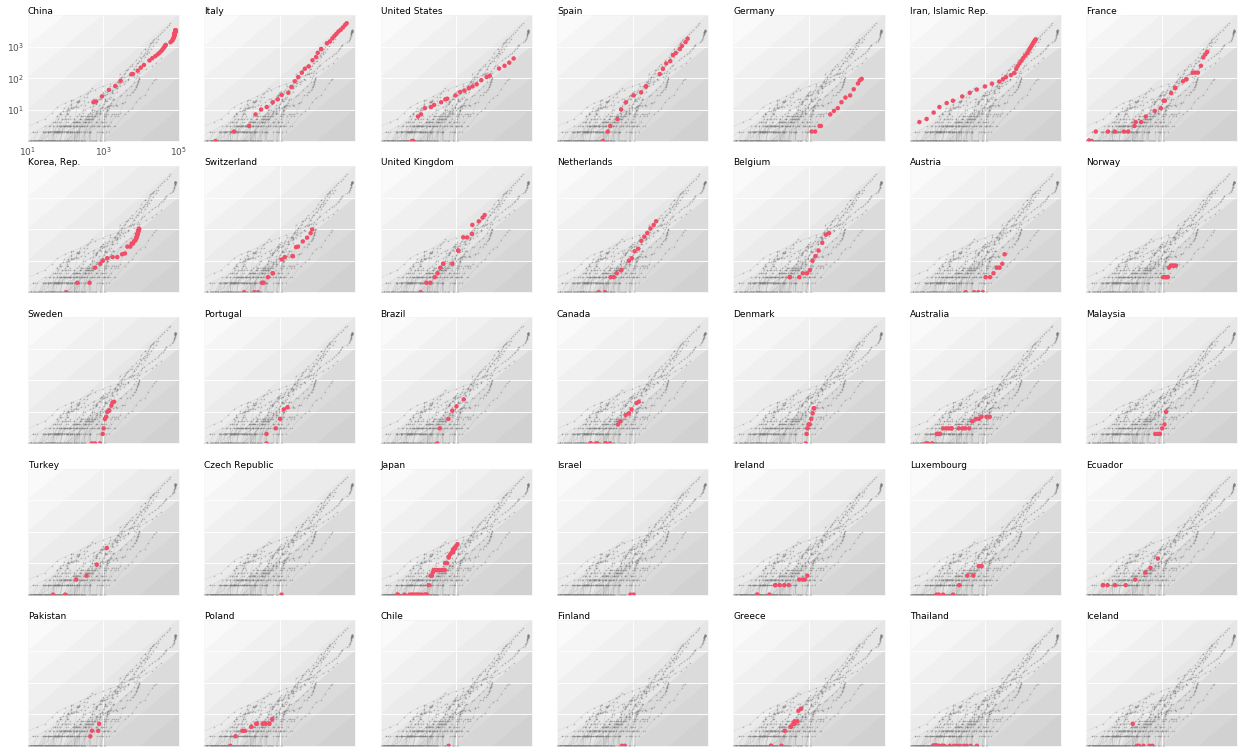

In [2127]:
ncols=7
k=0
w=.3
dw=.05
h=.25
dh=.05
plt.figure(figsize=[7,7])

for country in countries_sel:
    r,c=divmod(k,ncols)
    ax=plt.axes([c*(w+dw),-r*(h+dh),w,h])
    plot_cases_deaths(ax,df,deaths_df,country)
    if k>0:
        ax.set_xticklabels('')
        ax.set_yticklabels('')
    k+=1
    
plt.savefig(projectpath+'covid19_casesvsdeaths_'+df.index[-1].strftime('%Y%m%d')+'.png',bbox_inches='tight',dpi=600)

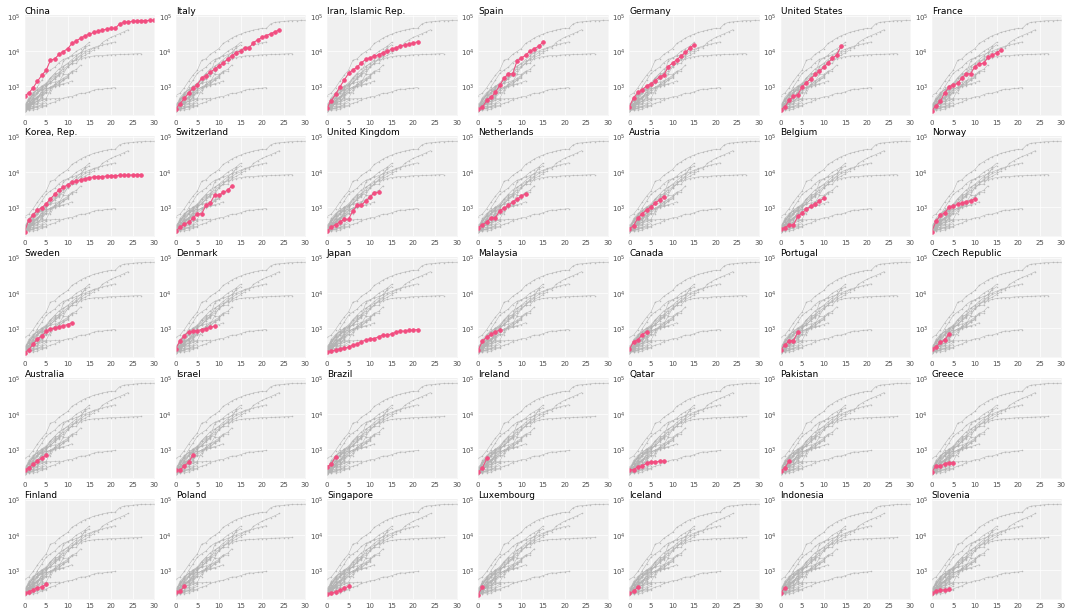

In [1005]:
ncols=7
k=0
w=.3
dw=.05
h=.35
dh=.07

for country in countries_sel:
    r,c=divmod(k,ncols)
    ax=plt.axes([c*(w+dw),-r*(h+dh),w,h])
    plot_allcases(ax,df,country)
    k+=1
    
plt.savefig(projectpath+'covid_19_cases'+df.index[-1].strftime('%Y%m%d')+'.png',bbox_inches='tight',dpi=600)

In [1010]:
deaths_df['Germany'].tail()

2020-03-15    11
2020-03-16    17
2020-03-17    24
2020-03-18    28
2020-03-19    44
Name: Germany, dtype: int64

In [667]:
countries_all=[col for col in df.columns if (len(np.where(df.columns==col)[0])<2)]
countries_all2=[c for c in countries_all if df[c][-1]>150][0:35]

In [673]:
countries_sel=df.iloc[-1].sort_values(ascending=False).index.values[0:35]
countries_sel

array(['China', 'Italy', 'Iran, Islamic Rep.', 'Spain', 'Germany',
       'France', 'Korea, Rep.', 'Switzerland', 'United Kingdom',
       'Netherlands', 'Austria', 'Norway', 'Belgium', 'Sweden', 'Denmark',
       'Japan', 'Malaysia', 'Czech Republic', 'Qatar', 'Portugal',
       'Israel', 'Greece', 'Brazil', 'Finland', 'Singapore', 'Pakistan',
       'Ireland', 'Slovenia', 'Romania', 'Estonia', 'Bahrain', 'Poland',
       'Iceland', 'Chile', 'Indonesia'], dtype=object)

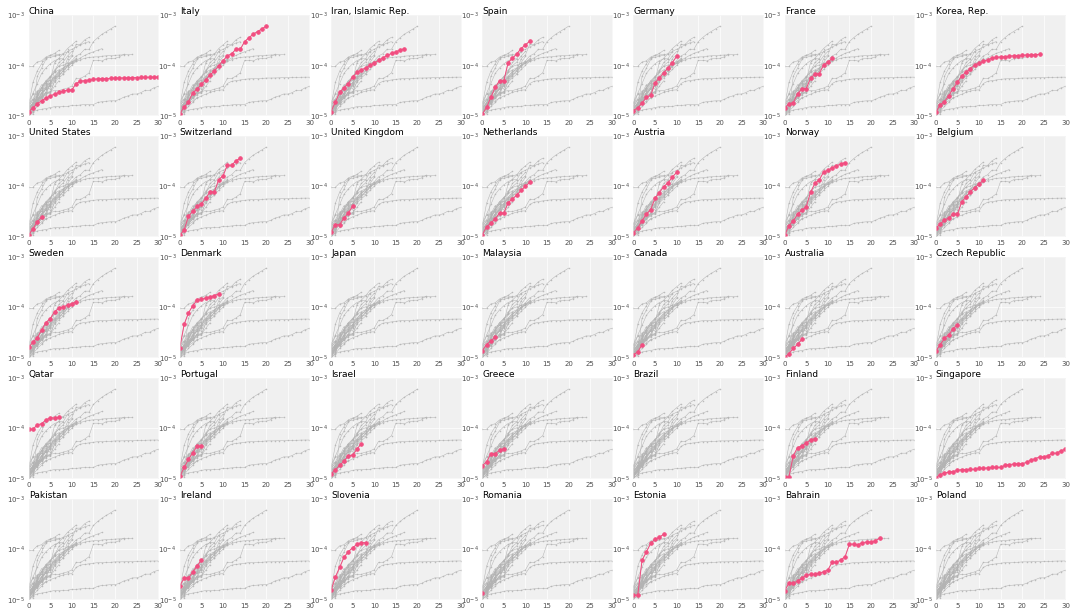

In [817]:
ncols=7
k=0
w=.3
dw=.05
h=.35
dh=.07

for country in countries_sel:
    r,c=divmod(k,ncols)
    ax=plt.axes([c*(w+dw),-r*(h+dh),w,h])
    plot_all_rel(ax,df,pop_df,country)
    k+=1
    
plt.savefig(projectpath+'covid_19_smult_rel'+df.index[-1].strftime('%Y%m%d')+'.png',bbox_inches='tight',dpi=600)